# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""

EPOCHS = 50
BATCH_SIZE = 256
LEARNING_RATE = [1e-3,1e-4]
EPOCHS = 50

In [7]:

def get_optimizer(optimizer_name):
    OPTIMIZERS = {"SGD":keras.optimizers.SGD(lr=lr),
                  "RMSprop":keras.optimizers.RMSprop(lr=lr),
                  "AdaGrad":keras.optimizers.Adagrad(lr=lr),
                  "Adam":keras.optimizers.Adam(lr=lr)}
    return OPTIMIZERS.get(optimizer_name)

In [9]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""

for lr in LEARNING_RATE:
    optimizer_names = ["SGD","RMSprop","AdaGrad","Adam"]
    for optimizer_name in optimizer_names:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with lr = %f , optimizer=%s" % (lr,optimizer_name))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        #optimizer = keras.optimizers.SGD(lr=lr)
        optimizer = get_optimizer(optimizer_name)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]

        exp_name_tag = "lr: %f optimizer: %s" % (lr,optimizer_name)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with lr = 0.001000 , optimizer=SGD
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50

50000/50000 [==============================] - 6s 127us/step - loss: 1.6886 - accuracy: 0.4136 - val_loss: 1.6926 - val_accuracy: 0.4128
Epoch 49/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.6851 - accuracy: 0.4152 - val_loss: 1.6889 - val_accuracy: 0.4140
Epoch 50/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.6814 - accuracy: 0.4163 - val_loss: 1.6863 - val_accuracy: 0.4134
Experiment with lr = 0.001000 , optimizer=RMSprop
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
____________________________________

50000/50000 [==============================] - 8s 166us/step - loss: 0.8366 - accuracy: 0.6981 - val_loss: 1.9380 - val_accuracy: 0.4767
Epoch 46/50
50000/50000 [==============================] - 8s 167us/step - loss: 0.8299 - accuracy: 0.7010 - val_loss: 1.9521 - val_accuracy: 0.4720
Epoch 47/50
50000/50000 [==============================] - 8s 165us/step - loss: 0.8152 - accuracy: 0.7064 - val_loss: 1.7711 - val_accuracy: 0.5041
Epoch 48/50
50000/50000 [==============================] - 8s 168us/step - loss: 0.8023 - accuracy: 0.7118 - val_loss: 2.0827 - val_accuracy: 0.4611
Epoch 49/50
50000/50000 [==============================] - 8s 164us/step - loss: 0.7914 - accuracy: 0.7152 - val_loss: 2.0277 - val_accuracy: 0.4812
Epoch 50/50
50000/50000 [==============================] - 8s 167us/step - loss: 0.7772 - accuracy: 0.7211 - val_loss: 2.1175 - val_accuracy: 0.4501
Experiment with lr = 0.001000 , optimizer=AdaGrad
Model: "model_1"
___________________________________________________

50000/50000 [==============================] - 8s 150us/step - loss: 1.2907 - accuracy: 0.5496 - val_loss: 1.3807 - val_accuracy: 0.5078
Epoch 43/50
50000/50000 [==============================] - 8s 150us/step - loss: 1.2859 - accuracy: 0.5521 - val_loss: 1.3808 - val_accuracy: 0.5104
Epoch 44/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.2823 - accuracy: 0.5513 - val_loss: 1.3808 - val_accuracy: 0.5080
Epoch 45/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.2777 - accuracy: 0.5540 - val_loss: 1.3872 - val_accuracy: 0.5060
Epoch 46/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.2742 - accuracy: 0.5560 - val_loss: 1.3698 - val_accuracy: 0.5106
Epoch 47/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.2684 - accuracy: 0.5568 - val_loss: 1.3967 - val_accuracy: 0.5085
Epoch 48/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.2653 - accuracy: 0.5590 - val_loss:

50000/50000 [==============================] - 10s 195us/step - loss: 0.8110 - accuracy: 0.7113 - val_loss: 1.5377 - val_accuracy: 0.5350
Epoch 40/50
50000/50000 [==============================] - 10s 197us/step - loss: 0.7907 - accuracy: 0.7186 - val_loss: 1.5652 - val_accuracy: 0.5300
Epoch 41/50
50000/50000 [==============================] - 10s 193us/step - loss: 0.7746 - accuracy: 0.7232 - val_loss: 1.6013 - val_accuracy: 0.5211
Epoch 42/50
50000/50000 [==============================] - 10s 198us/step - loss: 0.7550 - accuracy: 0.7301 - val_loss: 1.5872 - val_accuracy: 0.5286
Epoch 43/50
50000/50000 [==============================] - 10s 197us/step - loss: 0.7437 - accuracy: 0.7334 - val_loss: 1.5980 - val_accuracy: 0.5265
Epoch 44/50
50000/50000 [==============================] - 10s 195us/step - loss: 0.7315 - accuracy: 0.7389 - val_loss: 1.6210 - val_accuracy: 0.5263
Epoch 45/50
50000/50000 [==============================] - 10s 197us/step - loss: 0.7087 - accuracy: 0.7459 - va

50000/50000 [==============================] - 7s 134us/step - loss: 2.0628 - accuracy: 0.2847 - val_loss: 2.0607 - val_accuracy: 0.2897
Epoch 37/50
50000/50000 [==============================] - 7s 140us/step - loss: 2.0588 - accuracy: 0.2858 - val_loss: 2.0567 - val_accuracy: 0.2907
Epoch 38/50
50000/50000 [==============================] - 7s 139us/step - loss: 2.0548 - accuracy: 0.2872 - val_loss: 2.0528 - val_accuracy: 0.2921
Epoch 39/50
50000/50000 [==============================] - 7s 145us/step - loss: 2.0510 - accuracy: 0.2889 - val_loss: 2.0491 - val_accuracy: 0.2923
Epoch 40/50
50000/50000 [==============================] - 7s 139us/step - loss: 2.0472 - accuracy: 0.2897 - val_loss: 2.0454 - val_accuracy: 0.2942
Epoch 41/50
50000/50000 [==============================] - 7s 135us/step - loss: 2.0436 - accuracy: 0.2909 - val_loss: 2.0418 - val_accuracy: 0.2954
Epoch 42/50
50000/50000 [==============================] - 7s 138us/step - loss: 2.0400 - accuracy: 0.2923 - val_loss:

50000/50000 [==============================] - 9s 176us/step - loss: 1.1181 - accuracy: 0.6099 - val_loss: 1.4693 - val_accuracy: 0.4931
Epoch 34/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.1089 - accuracy: 0.6139 - val_loss: 1.3545 - val_accuracy: 0.5222
Epoch 35/50
50000/50000 [==============================] - 9s 181us/step - loss: 1.0951 - accuracy: 0.6179 - val_loss: 1.3376 - val_accuracy: 0.5277
Epoch 36/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.0805 - accuracy: 0.6209 - val_loss: 1.5025 - val_accuracy: 0.4784
Epoch 37/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.0726 - accuracy: 0.6247 - val_loss: 1.4052 - val_accuracy: 0.5037
Epoch 38/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.0601 - accuracy: 0.6293 - val_loss: 1.4208 - val_accuracy: 0.5055
Epoch 39/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.0506 - accuracy: 0.6330 - val_loss

50000/50000 [==============================] - 8s 162us/step - loss: 1.6876 - accuracy: 0.4149 - val_loss: 1.6914 - val_accuracy: 0.4172
Epoch 31/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.6848 - accuracy: 0.4161 - val_loss: 1.6891 - val_accuracy: 0.4160
Epoch 32/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.6821 - accuracy: 0.4166 - val_loss: 1.6868 - val_accuracy: 0.4165
Epoch 33/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.6796 - accuracy: 0.4176 - val_loss: 1.6842 - val_accuracy: 0.4187
Epoch 34/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.6770 - accuracy: 0.4195 - val_loss: 1.6824 - val_accuracy: 0.4220
Epoch 35/50
50000/50000 [==============================] - 8s 167us/step - loss: 1.6746 - accuracy: 0.4202 - val_loss: 1.6806 - val_accuracy: 0.4211
Epoch 36/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.6723 - accuracy: 0.4206 - val_loss:

50000/50000 [==============================] - 10s 203us/step - loss: 1.0878 - accuracy: 0.6207 - val_loss: 1.3323 - val_accuracy: 0.5330
Epoch 28/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.0748 - accuracy: 0.6259 - val_loss: 1.3131 - val_accuracy: 0.5363
Epoch 29/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.0657 - accuracy: 0.6296 - val_loss: 1.3416 - val_accuracy: 0.5320
Epoch 30/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.0529 - accuracy: 0.6326 - val_loss: 1.3505 - val_accuracy: 0.5302
Epoch 31/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.0451 - accuracy: 0.6365 - val_loss: 1.3110 - val_accuracy: 0.5394
Epoch 32/50
50000/50000 [==============================] - 9s 181us/step - loss: 1.0317 - accuracy: 0.6428 - val_loss: 1.3183 - val_accuracy: 0.5425
Epoch 33/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.0093 - accuracy: 0.6492 - val_loss

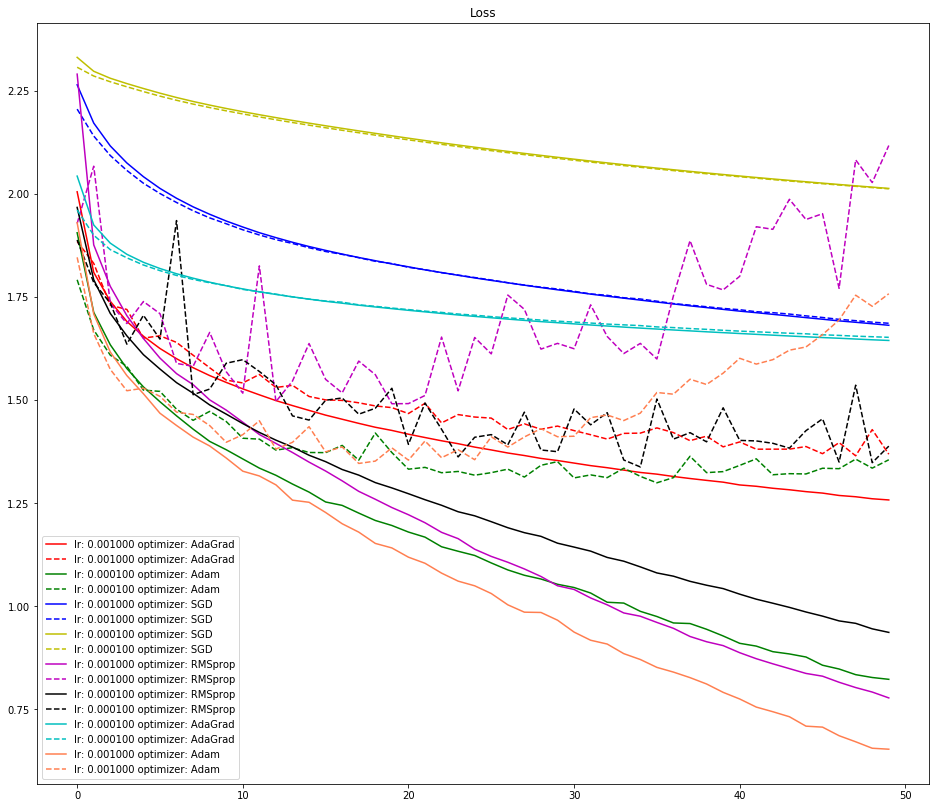

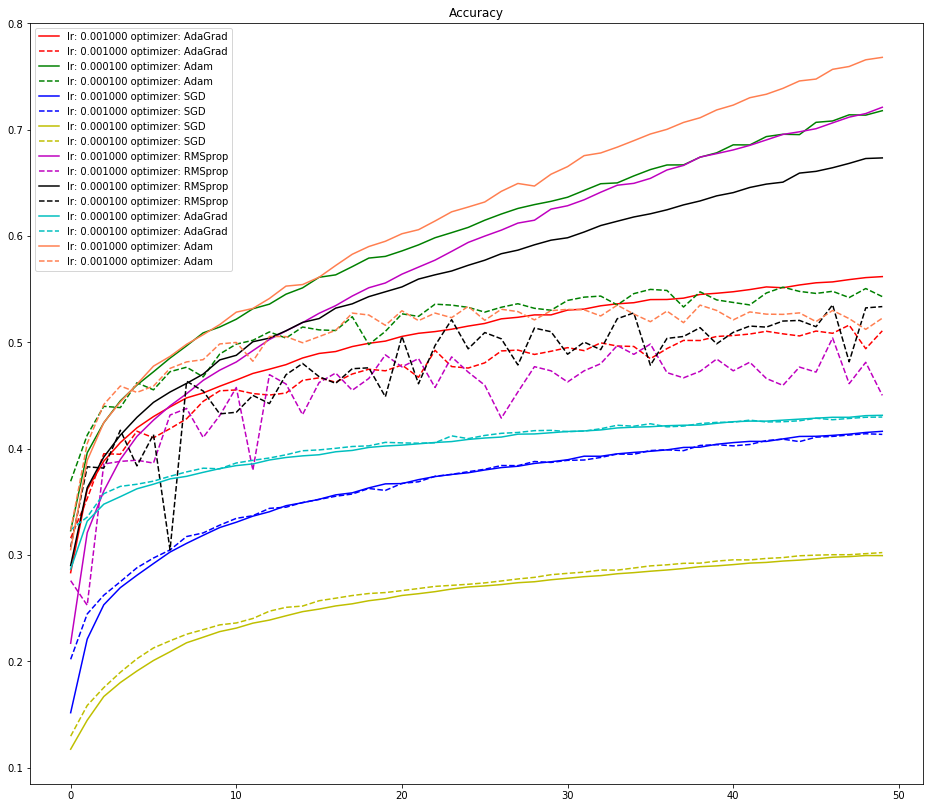

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k",'c','coral']

plt.figure(figsize=(16,14))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(16,14))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()